In [44]:
!pip install gymnasium

In [45]:
import gymnasium as gym
import numpy as np
import random
import time

In [46]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [47]:
# Initialize Q-value table randomly
# q_table = np.zeros((env.observation_space.n, env.action_space.n))
# print(q_table)

In [48]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

# Q-learning


In [49]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

# SARSA


In [50]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []

    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)
        #sample action before looping
        exploration = random.uniform(0, 1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        for step in range(num_steps_per_episode):
            next_state, reward, terminated, truncated, _ = env.step(action)
            
            exploration = random.uniform(0, 1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])
    
            sample = reward + gamma * q_table[next_state, next_action]
            q_table[state, action] += learning_rate * (sample - q_table[state, action])

            reward_episode += reward
            state = next_state
            action = next_action

            if terminated or truncated:
                break

        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [51]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [52]:
q_table

array([[5.31685527e-01, 5.06420398e-01, 4.98606872e-01, 4.90210931e-01],
       [7.86168445e-02, 1.56214442e-01, 7.28444848e-02, 4.85931810e-01],
       [4.01120268e-01, 1.24335962e-01, 1.84792313e-01, 1.58877142e-01],
       [1.54943447e-01, 7.88783541e-06, 1.77359781e-08, 1.86370448e-06],
       [5.46740348e-01, 3.40140081e-01, 4.03627311e-01, 3.12844041e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.23033276e-01, 1.30373335e-01, 2.92826276e-01, 1.72294946e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79946675e-01, 3.88564452e-01, 3.40458325e-01, 5.79937324e-01],
       [5.76571979e-01, 6.05755501e-01, 3.75684069e-01, 3.73412992e-01],
       [5.31514047e-01, 4.16135460e-01, 2.97050428e-01, 2.95770909e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.14123400e-01, 5.89579247e-01, 6.99159699e

In [53]:
sum(rewards_all)

12800.0

In [54]:
sum(rewards_all[0:1000])

252.0

In [55]:
sum(rewards_all[1000:2000])

616.0

In [56]:
sum(rewards_all[2000:3000])

630.0

In [57]:
sum(rewards_all[9000:10000])

644.0

In [58]:
sum(rewards_all[19000:20000])

686.0

In [59]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [60]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [61]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [62]:
# play_multiple_times(env, q_table, 1000)

In [63]:
# play(env, q_table, render=True)

# Frozenlake-v1


In [64]:
env1 = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [65]:
q_table, q_rewards_all = q_learning(env1, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [66]:
sarsa_q_table, sarsa_rewards_all = sarsa(env1, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [67]:
q_table

array([[0.48738794, 0.48288874, 0.48198057, 0.48137529],
       [0.2297341 , 0.3001645 , 0.20380031, 0.43837445],
       [0.38158531, 0.22162579, 0.1919656 , 0.29081925],
       [0.16760076, 0.00408642, 0.00393879, 0.00367396],
       [0.51160769, 0.29492583, 0.37610467, 0.38161432],
       [0.        , 0.        , 0.        , 0.        ],
       [0.37891194, 0.09384878, 0.16737912, 0.06872562],
       [0.        , 0.        , 0.        , 0.        ],
       [0.27762924, 0.51996276, 0.43033014, 0.55902191],
       [0.46343565, 0.61312649, 0.41044796, 0.44556359],
       [0.61990733, 0.38804433, 0.31703565, 0.3165357 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.50224685, 0.53024869, 0.71179328, 0.54203537],
       [0.70411895, 0.83599751, 0.76572552, 0.76629091],
       [0.        , 0.        , 0.        , 0.        ]])

In [68]:
sarsa_q_table

array([[4.93082706e-01, 4.48689115e-01, 4.40035543e-01, 4.50057419e-01],
       [1.02741688e-01, 2.63855960e-01, 1.24299974e-01, 4.32898851e-01],
       [3.41610371e-01, 1.75899168e-01, 2.05303898e-01, 2.69432536e-01],
       [1.84921302e-01, 3.59277268e-04, 2.10090921e-05, 2.87986683e-04],
       [5.08657089e-01, 3.38734691e-01, 2.82043121e-01, 3.95046507e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.94539095e-01, 1.05798626e-01, 6.54438680e-02, 1.53169096e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.18437882e-01, 3.93991140e-01, 2.54118157e-01, 5.30009447e-01],
       [3.68526873e-01, 5.57491700e-01, 2.79326157e-01, 4.73769272e-01],
       [5.14660498e-01, 2.76844108e-01, 3.32712404e-01, 3.00302850e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.70466888e-01, 5.02865507e-01, 6.37979084e

In [69]:
play_multiple_times(env1, q_table, 1000)

Number of successes: 724/1000
Average number of steps: 36.73756906077348


In [70]:
play_multiple_times(env1, sarsa_q_table, 1000)

Number of successes: 741/1000
Average number of steps: 36.6693657219973


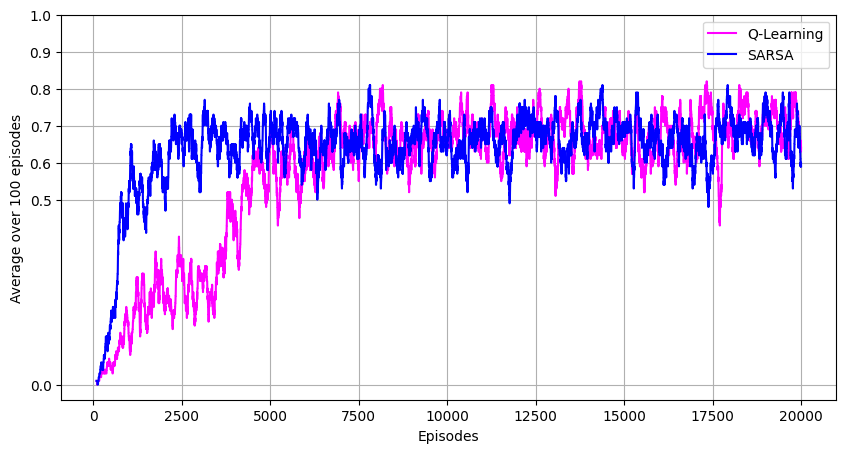

In [71]:
window = 100
def moving_average(data, window):
    average_y = []
    for ind in range(len(data) - window + 1):
        average_y.append(np.mean(data[ind:ind + window]))
    for ind in range(window - 1):
        average_y.insert(0, np.nan)
    return average_y

average_rewards_q_learning = moving_average(q_rewards_all, window)
average_rewards_sarsa = moving_average(sarsa_rewards_all, window)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(q_rewards_all)), average_rewards_q_learning, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards_all)), average_rewards_sarsa, color='blue', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# FrozenLake8x8-v1

In [72]:
env2 = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")


In [73]:
# Hyperparameters for FrozenLake8x8-v1
learning_rate_2 = 0.9
gamma_2 = 0.9
min_epsilon_2 = 0.001
epsilon_decay_rate_2 = 0.00005
num_episodes_2 = 250000
num_steps_per_episode_2 = 200

In [74]:
q_table2, q_rewards_all2 = q_learning(env2, num_episodes_2, num_steps_per_episode_2, learning_rate_2, gamma_2, max_epsilon, min_epsilon_2, epsilon_decay_rate_2)

Episode 249999 finished


In [75]:
sarsa_q_table2, sarsa_rewards_all2 = sarsa(env2, num_episodes_2, num_steps_per_episode_2, learning_rate_2, gamma_2, max_epsilon, min_epsilon_2, epsilon_decay_rate_2)

Episode 249999 finished


In [76]:
q_table2

array([[4.77484195e-05, 3.91419972e-04, 7.88779651e-04, 4.73147399e-05],
       [5.65446940e-05, 4.39213653e-04, 1.10867941e-03, 4.89363809e-05],
       [4.76923568e-05, 6.73575035e-04, 2.96196867e-02, 6.28619034e-04],
       [1.08276420e-04, 1.35716009e-02, 1.13197480e-04, 6.65183452e-04],
       [2.66529504e-03, 4.91962217e-04, 8.75404906e-03, 1.31960057e-03],
       [3.41322075e-03, 1.07490046e-02, 4.38488374e-04, 6.91322577e-04],
       [6.45818353e-04, 1.20205375e-02, 1.18454328e-03, 1.23628795e-03],
       [7.21736715e-04, 2.60817512e-02, 3.00204564e-03, 1.59281009e-03],
       [7.51509227e-04, 4.01748515e-05, 2.80789423e-05, 3.58954204e-04],
       [1.96568709e-04, 5.67193310e-05, 6.50889922e-05, 5.86780631e-04],
       [6.61357607e-05, 5.83534740e-05, 6.54526738e-05, 9.97592041e-04],
       [4.21864440e-05, 9.24997013e-06, 3.61380587e-05, 2.51703163e-03],
       [1.42896638e-03, 2.41330932e-04, 1.13614927e-03, 9.36538431e-03],
       [5.40087702e-04, 8.54324284e-04, 4.05294582e

In [77]:
sarsa_q_table2

array([[8.27699226e-05, 8.79926456e-05, 8.55133292e-05, 1.32112895e-02],
       [8.83164553e-05, 1.45321923e-02, 7.95918984e-05, 1.01612149e-04],
       [1.62856333e-04, 1.23441305e-04, 1.60419616e-04, 1.05946720e-02],
       [2.58405954e-04, 1.22015964e-04, 1.40836973e-02, 1.95092216e-04],
       [1.59304001e-04, 6.09161343e-04, 4.99785775e-02, 1.95091102e-04],
       [4.87461822e-04, 4.53622764e-04, 9.65726172e-04, 9.68298686e-02],
       [1.20537529e-03, 5.91802550e-04, 5.18301024e-02, 6.52351022e-04],
       [2.22251069e-03, 6.00075004e-04, 1.50956213e-02, 5.64031147e-04],
       [4.32897718e-05, 7.68217497e-05, 3.50483754e-05, 9.11283275e-03],
       [1.78172444e-05, 4.01908765e-05, 5.44489750e-05, 9.36052895e-04],
       [4.47275608e-05, 2.23411649e-05, 3.75399533e-03, 7.15680934e-05],
       [6.61284640e-05, 6.99298180e-05, 4.51970723e-05, 6.41922315e-03],
       [1.88096437e-04, 1.38961481e-04, 2.25069039e-04, 1.98475178e-02],
       [6.98148761e-04, 2.33241198e-04, 2.87692935e

In [98]:
play_multiple_times(env2, q_table2, 1000)

Number of successes: 653/1000
Average number of steps: 90.64931087289433


In [94]:
play_multiple_times(env2, sarsa_q_table2, 1000)

Number of successes: 487/1000
Average number of steps: 91.57084188911705


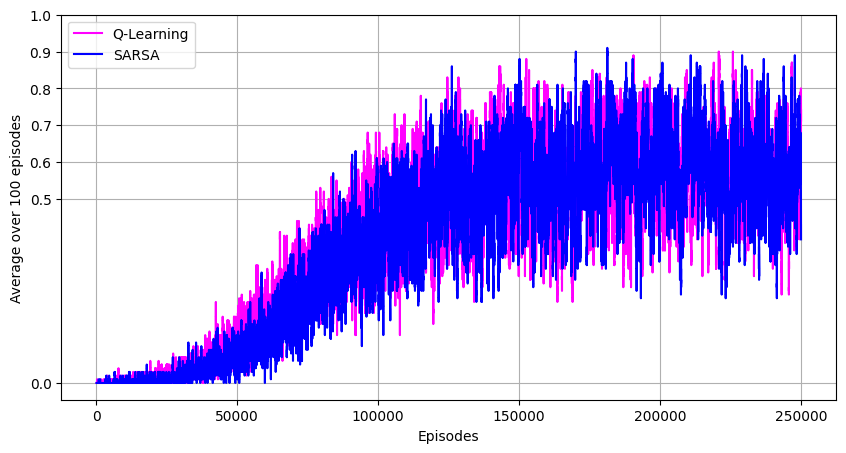

In [80]:
window = 100
def moving_average(data, window):
    average_y = []
    for ind in range(len(data) - window + 1):
        average_y.append(np.mean(data[ind:ind + window]))
    for ind in range(window - 1):
        average_y.insert(0, np.nan)
    return average_y

average_rewards_q_learning = moving_average(q_rewards_all2, window)
average_rewards_sarsa = moving_average(sarsa_rewards_all2, window)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(q_rewards_all2)), average_rewards_q_learning, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards_all2)), average_rewards_sarsa, color='blue', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# Taxi-v3

In [81]:
env3 = gym.make("Taxi-v3", render_mode="rgb_array")

In [82]:

q_table3, q_rewards_all3 = q_learning(env3, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [83]:
sarsa_q_table3, sarsa_rewards_all3 = sarsa(env3, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)


Episode 19999 finished


In [84]:
q_table3

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.39497564e-02, -2.64689935e+00, -1.77716810e+00,
        -1.50328208e+00,  9.62206970e+00, -4.75229941e+00],
       [ 1.39014966e+00,  1.77091647e+00, -4.32230356e-01,
         1.80985376e+00,  1.41188060e+01, -6.75225255e+00],
       ...,
       [-1.09451647e+00, -3.51352825e-01, -1.08470521e+00,
        -1.05366495e+00, -1.99900000e+00, -4.26913829e+00],
       [-2.65207599e+00, -2.63434121e+00, -2.62436566e+00,
        -1.24418099e+00, -5.70927452e+00, -5.70264122e+00],
       [-1.99900000e-01, -1.16032397e-01, -1.99900000e-01,
         9.97378642e+00, -1.00000000e+00, -1.90000000e+00]])

In [85]:
sarsa_q_table3

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.82162399, -2.26315589, -3.28433217, -0.41588562,  9.35105967,
        -5.14413078],
       [-0.87486752,  0.74223365, -0.60316793,  1.08998682, 13.51329379,
        -4.90807546],
       ...,
       [-1.8858053 , -0.32971865, -1.81467449, -1.87517005, -3.4756883 ,
        -4.28410514],
       [-3.46542755, -3.46208841, -3.5873268 ,  0.13826398, -6.5117385 ,
        -7.29251912],
       [ 7.15777977,  4.26511402,  3.37088463, 18.8       ,  0.12650124,
        -1.        ]])

In [86]:
play_multiple_times(env3, q_table3, 1000)

Number of successes: 1000/1000
Average number of steps: 13.172


In [87]:
play_multiple_times(env3, sarsa_q_table3, 1000)


Number of successes: 1000/1000
Average number of steps: 13.094


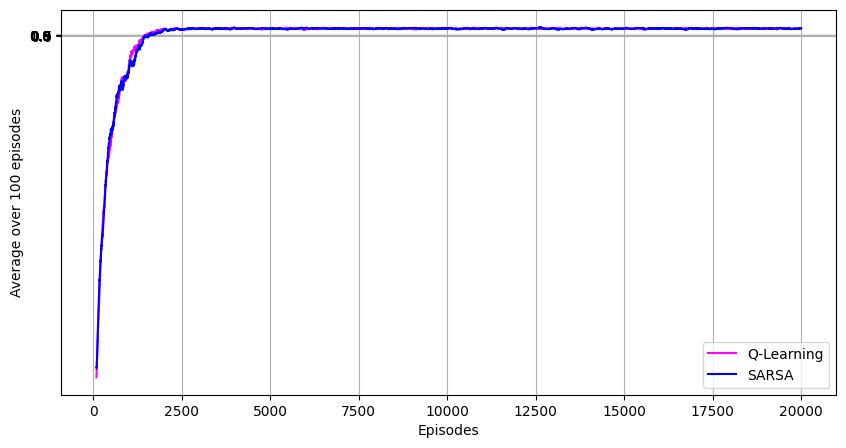

In [88]:
window = 100
def moving_average(data, window):
    average_y = []
    for ind in range(len(data) - window + 1):
        average_y.append(np.mean(data[ind:ind + window]))
    for ind in range(window - 1):
        average_y.insert(0, np.nan)
    return average_y

average_rewards_q_learning = moving_average(q_rewards_all3, window)
average_rewards_sarsa = moving_average(sarsa_rewards_all3, window)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(q_rewards_all3)), average_rewards_q_learning, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards_all3)), average_rewards_sarsa, color='blue', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# Nhận xét

Do sự khác biệt khi cập nhật giá trị Q(s, a) nên Q-learning và SARSA có cách học khác nhau. Q-learning không phụ thuộc vào chính sách hiện tại (off-policy)khi chọn argmax[Q(s', a')] để cập nhật Q(s,a), nên có thể thử những hành động mạo hiểm hơn nên cần nhiều thời gian để hội tụ hơn so với SARSA.

Đối với SARSA, chúng ta cập nhật Q(s,a) dựa vào hành động tiếp theo a' được thực hiện, nghĩa là nó dùng next_action để thực hiện cho next_state (trong khi Q-learning cập nhật Q(s,a) bằng 1 next_action và ở next_state có thể không thực hiện next_action đó). Điều này giúp SARSA được gọi là on-policy learning, và thực thực hiện ít các hành động mang tính exploration hơn và gần như hội tụ nhanh hơn.

Nhưng nhìn chung, ở các màn chơi FrozenLake8x8 và Taxi-v3, hiệu quả của 2 thuật toán trên gần như giống nhau, nên ta không thể kết luận hoàn toàn Q-learning hay SARSA tốt hơn, vì hiệu suất của thuật toán còn phụ thuộc nhiều vào môi trường.